## Support lines strategy

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from SupportLinesStrategy import SupportLinesStrategy

In [63]:
test = pd.read_csv('./data/2019-1-1-BTCUSDT-5m.csv').take(range(576))

In [64]:
strategy = SupportLinesStrategy(k1=0.5, k2=0.0007, k3=0.5, size=288)

In [65]:
for _, row in test.iterrows():
    ts = datetime.fromtimestamp(row['Open time']/1000)
    strategy.capture(ts, row['Open'], row['Close'], row['High'], row['Low'], row['Volume'], row['Number of trades'])

/Users/andr/Documents/Projects/andr/py-trader/AltBaseStrategy.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if self.df.close[-1] > v and self.df.close[-3] > v: self.df['min'][self.df.index[-2]] = v
/Users/andr/Documents/Projects/andr/py-trader/AltBaseStrategy.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if self.df.close[-1] < v and self.df.close[-3] < v: self.df['max'][self.df.index[-2]] = v


In [66]:
min_lines = []
max_lines = []

for l in strategy.min_lines:
    r = pd.DataFrame(data=l, columns=['ts','price'])
    r.set_index('ts', inplace=True)
    min_lines.append(r)
    
for l in strategy.max_lines:
    r = pd.DataFrame(data=l, columns=['ts','price'])
    r.set_index('ts', inplace=True)
    max_lines.append(r)

Text(0.5, 0, 'Intervals')

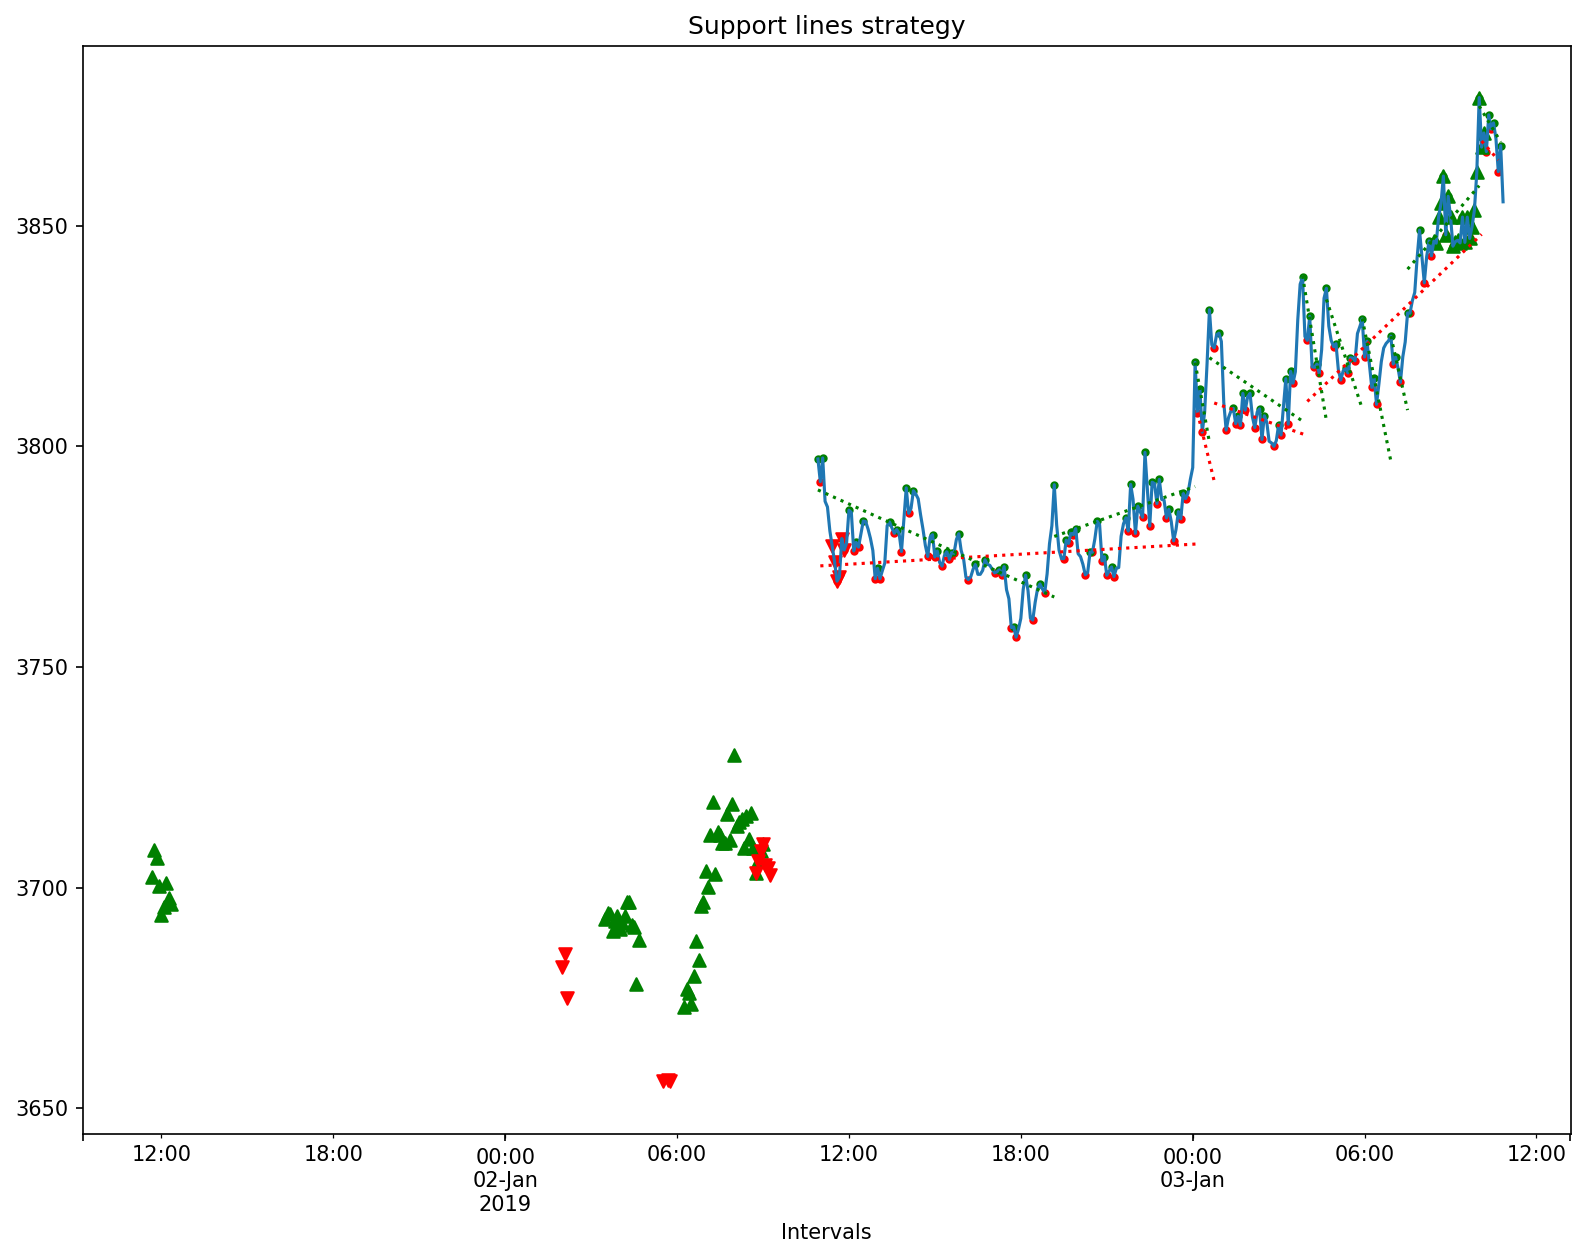

In [67]:
plt.figure(figsize=(12.8, 9.6), dpi=150)

strategy.df["close"].plot()
plt.scatter(strategy.df.index, strategy.df['min'], c='r', marker='.')
plt.scatter(strategy.df.index, strategy.df['max'], c='g', marker='.')
if not strategy.buy is None: plt.scatter(strategy.buy.index, strategy.buy['price'], c='g', marker='^')
if not strategy.sell is None: plt.scatter(strategy.sell.index, strategy.sell['price'], c='r', marker='v')
for sl in min_lines: sl['price'].plot(c='r',linestyle=':')
for sl in max_lines: sl['price'].plot(c='g',linestyle=':')
plt.title("Support lines strategy")
plt.xlabel("Intervals")

In [68]:
print(strategy.maxs)

[[1267838.9399696256, -0.000817399866012647], [-983837.503126463, 0.0006386324336516093], [15571656.270001078, -0.010066666666667364], [1901983.3488815604, -0.0012274122807017424], [16937875.688333366, -0.01095000000000002], [8510404.219322065, -0.005500564971751432], [13916856.806315597, -0.008996491228070051], [12350038.004999908, -0.007983333333333273], [-3248497.4692929382, 0.002103030303030309], [3390732.6300000846, -0.0021900000000000548], [4675096.71631158, -0.0030204918032787557]]
